# Quantitative Finance Model using Donadio and Ghosh Learn Algorithmic Trading Chapter 1 Examples
### David Lowe
### August 1, 2022

NOTE: This script is for learning purposes only and does not constitute a recommendation for buying or selling any stock mentioned in this script.

SUMMARY: This project aims to construct and test an algorithmic trading model and document the end-to-end steps using a template.

INTRODUCTION: This script aims to replicate the examples found in chapter one of the book Learn Algorithmic Trading by Sebastien Donadio and Sourav Ghosh. The script seeks to validate the Python environment and package requirements for running these code examples successfully. The eventual goal is to integrate various example code segments from the book into an end-to-end algorithmic trading system.

Dataset ML Model: Time series analysis with numerical attributes

Dataset Used: Sharadar US Equities and Fund Prices from Quandl/Nasdaq Data Link

Source and Further Discussion of the Code Examples: https://github.com/PacktPublishing/Learn-Algorithmic-Trading

# Task 1 - Prepare Environment

## 1.a) Load the required packages and modules

In [1]:
import numpy as np
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
# import seaborn as sns

## 1.b) Set up the controlling parameters and functions

In [2]:
# Specify the key modeling parameters below
DATA_STORE = '../sharadar.h5'
ticker_symbol = 'GOOGL'

MODEL_START_DATE = date(2012, 1, 1)
print("Starting date for the model:", MODEL_START_DATE)

# MODEL_END_DATE = datetime.now().date()
MODEL_END_DATE = date(2021, 12, 31)
print("Ending date for the model:", MODEL_END_DATE)

Starting date for the model: 2012-01-01
Ending date for the model: 2021-12-31


# Task 2 - Acquire and Pre-Process Data

## Instead of using pandas-datareader like in the book example, this script will use a home-grown data source.

In [3]:
with pd.HDFStore(DATA_STORE) as store:
    goog_data = (store['quandl/sharadar/sep'].loc[[ticker_symbol], ['open', 'high', 'low', 'closeadj', 'volume']])
goog_data.reset_index(level=0, inplace=True)
goog_data.sort_index(inplace=True)
goog_data = goog_data[MODEL_START_DATE:MODEL_END_DATE]
goog_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2012-01-03 to 2021-12-31
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ticker    2517 non-null   object 
 1   open      2517 non-null   float64
 2   high      2517 non-null   float64
 3   low       2517 non-null   float64
 4   closeadj  2517 non-null   float64
 5   volume    2517 non-null   float64
dtypes: float64(5), object(1)
memory usage: 137.6+ KB


# Task 3 - Build and train quantitative models

In [4]:
goog_data_signal = pd.DataFrame(index=goog_data.index)
goog_data_signal['price'] = goog_data['closeadj']
goog_data_signal['daily_difference'] = goog_data_signal['price'].diff()
goog_data_signal['signal'] = 0.0
goog_data_signal['signal'][:] = np.where(goog_data_signal['daily_difference'][:] > 0, 1.0, 0.0)
goog_data_signal['positions'] = goog_data_signal['signal'].diff()
print(goog_data_signal.head(),'\n')
print(goog_data_signal.tail())

             price  daily_difference  signal  positions
date                                                   
2012-01-03  16.652               NaN     0.0        NaN
2012-01-04  16.724             0.072     1.0        1.0
2012-01-05  16.492            -0.232     0.0       -1.0
2012-01-06  16.267            -0.225     0.0        0.0
2012-01-09  15.577            -0.690     0.0        0.0 

              price  daily_difference  signal  positions
date                                                    
2021-12-27  147.906             0.990     1.0        0.0
2021-12-28  146.687            -1.219     0.0       -1.0
2021-12-29  146.655            -0.032     0.0        0.0
2021-12-30  146.201            -0.454     0.0        0.0
2021-12-31  144.852            -1.349     0.0        0.0


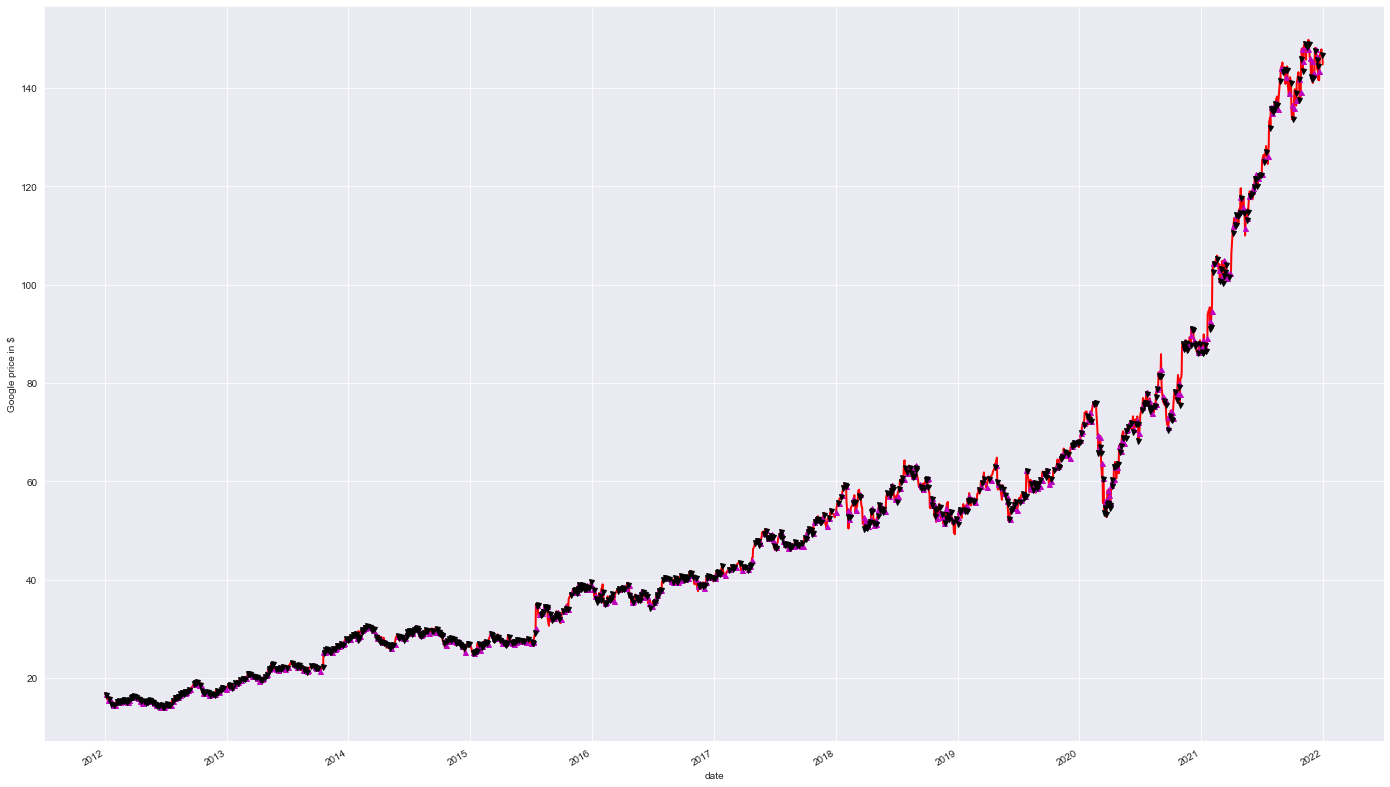

In [5]:
fig = plt.figure(figsize=(24, 15))
ax1 = fig.add_subplot(111, ylabel='Google price in $')
goog_data_signal['price'].plot(ax=ax1, color='r', lw=2.)

ax1.plot(goog_data_signal.loc[goog_data_signal.positions == 1.0].index,
         goog_data_signal.price[goog_data_signal.positions == 1.0],
         '^', markersize=5, color='m')

ax1.plot(goog_data_signal.loc[goog_data_signal.positions == -1.0].index,
         goog_data_signal.price[goog_data_signal.positions == -1.0],
         'v', markersize=5, color='k')

plt.show()

# Task 4 - Back-test the model

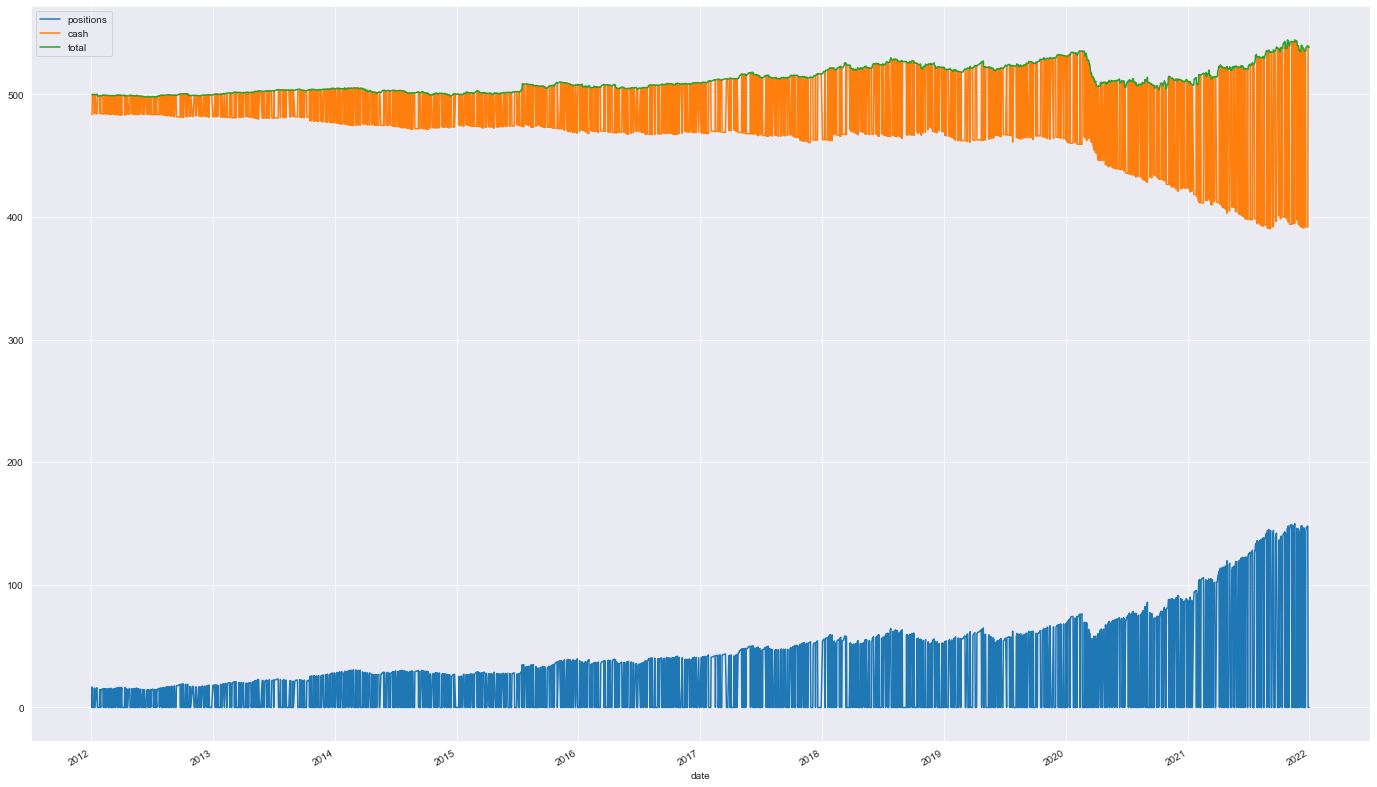

In [6]:
# Set the initial capital
initial_capital= float(500.0)

positions = pd.DataFrame(index=goog_data_signal.index).fillna(0.0)
portfolio = pd.DataFrame(index=goog_data_signal.index).fillna(0.0)


positions['GOOG'] = goog_data_signal['signal']
portfolio['positions'] = (positions.multiply(goog_data_signal['price'], axis=0))
portfolio['cash'] = initial_capital - (positions.diff().multiply(goog_data_signal['price'], axis=0)).cumsum()
portfolio['total'] = portfolio['positions'] + portfolio['cash']
portfolio.plot(figsize=(24, 15))
plt.show()

# Evaluate model performance

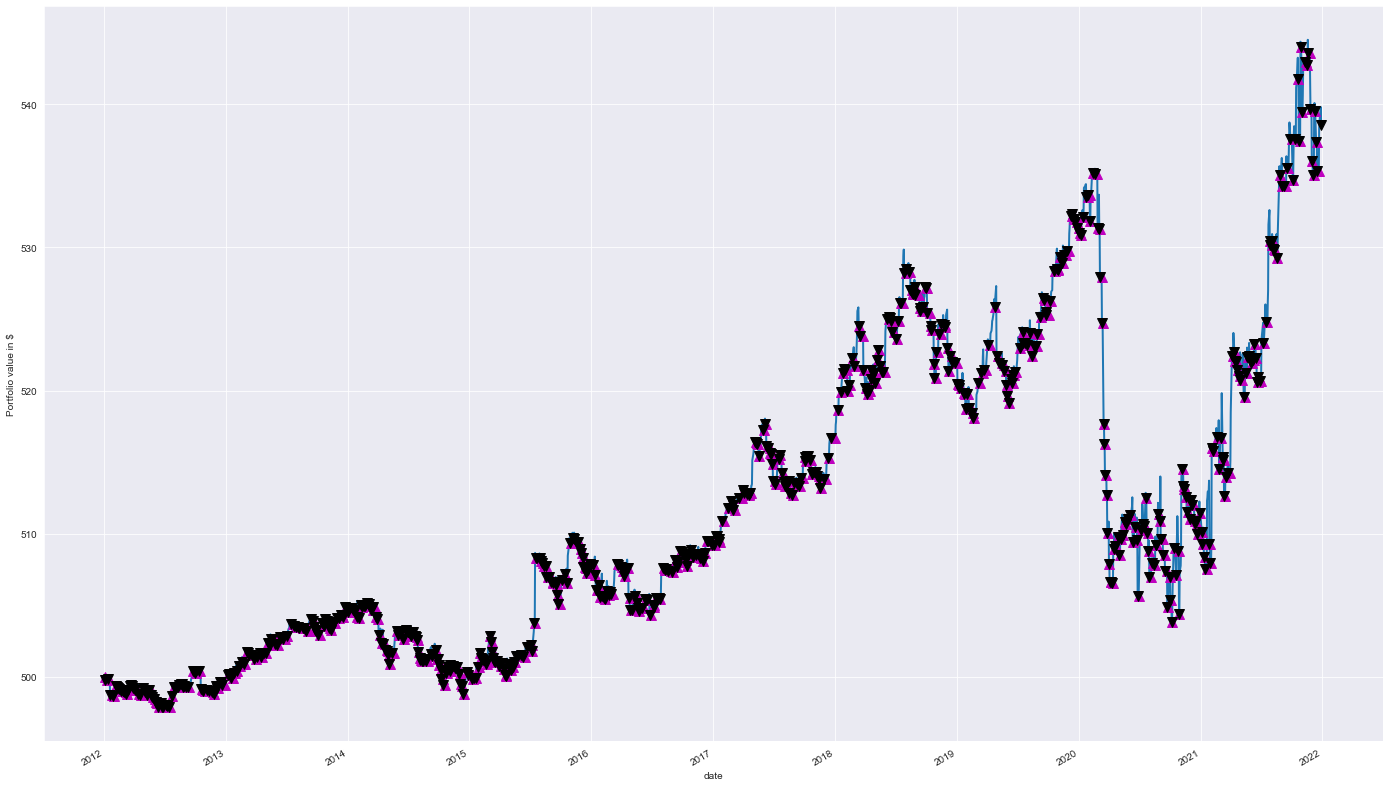

In [7]:
fig = plt.figure(figsize=(24, 15))
ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')
portfolio['total'].plot(ax=ax1, lw=2.)
ax1.plot(portfolio.loc[goog_data_signal.positions == 1.0].index,portfolio.total[goog_data_signal.positions == 1.0],'^', markersize=10, color='m')
ax1.plot(portfolio.loc[goog_data_signal.positions == -1.0].index,portfolio.total[goog_data_signal.positions == -1.0],'v', markersize=10, color='k')
plt.show()